# Salary and Hall Of Fame Analysis

<i><p> In this notebook, I'll be analyzing players in the hall of fame dataset (which includes players who have been inducted, have recieved votes, or have been eligible for BBWAA consideration at some point) and merging the salary dataset to examine Hall of Fame player salaries and other characteristics of both datasets. I will use the sqlite database ( lahmans ) to acquire the players first and last name by merging on the playerID in the salary and HOF datasets. Once I have the full name of top-salaried or HOF players I will pass them into the API player Info endpoint in the MLB Data API to see stats such as position, batting stance, etc. </p> </i>

#### Load modules

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import sqlite3
import altair as alt
import seaborn as sb
from scipy import stats
import warnings

In [2]:
import warnings
# ingoring warnings for notebook
warnings.filterwarnings('ignore')

#### Reading in Files 

In [3]:
sal_df=pd.read_csv("Salaries.csv")

hall_df=pd.read_csv("HallOfFame.csv")

## Salary and HOF

<i><h4> Highest average salaries in the salary csv </h4> </i>

In [4]:
sal_df.groupby('playerID').agg({'salary':np.mean,'yearID':np.mean}).astype(int).sort_values(by='salary',ascending=False).head(15)

# highest avg salaries in dataset

## matsuhisu Tanaka has the highest avg salary in the dataset at 22 mil (which is pretty crazy)


,salary,yearID
playerID,,
tanakma01,22000000,2014
rodrial01,17972202,2004
howarry01,15525500,2010
teixema01,14703846,2009
jeterde01,13927268,2005
sabatcc01,13831632,2008
fieldpr01,12891450,2010
kurodhi01,12580817,2011
linceti01,12444375,2011


#### Player whos accumulated the most money

In [5]:
sal_df.groupby('playerID').agg({'salary':sum,'yearID':np.mean}).astype(int).sort_values(by='salary',ascending=False).head(15)

## Alex rodriguez has made the most in the MLB (from our data) as he has accumulated
## 377 million throughout his career. The next highest player is derek jeter with 264 mil (a massive difference)

,salary,yearID
playerID,,
rodrial01,377416252,2004
jeterde01,264618093,2005
ramirma02,206827769,2002
sabatcc01,193642856,2008
teixema01,191150000,2009
beltrca01,190782782,2007
bondsba01,188245322,1996
pujolal01,179040436,2008
johnsra05,175550019,1999


In [6]:
# yet tanakma only has data for 2 years and earned 22 mil both years
sal_df[sal_df['playerID']=='tanakma01']

,yearID,teamID,lgID,playerID,salary
24428,2014,NYA,AL,tanakma01,22000000
25245,2015,NYA,AL,tanakma01,22000000


#### Highest salary of players inducted into the hall of fame, and the year of induction

In [7]:
# merging salary and hallOfFame dataframes on playerID using inner join. Inner Join gives us intersection of data 
## (i.e, playerID must be in both dataframes)
in_merge = sal_df.merge(hall_df,how='inner',on='playerID')

# selecting all players who have been inducted into the hall of fame
y_induc = in_merge[in_merge['inducted']=='Y']

# grouping on playerID, and getting sum of players salaries and votes
hall_sals=y_induc.groupby('playerID').agg({'salary':np.mean,'votes':np.mean,'yearid':np.mean,'yearID':np.mean}).sort_values("salary",ascending=False)

display(hall_sals)

# this is the mean amount of money earned, and the mean votes that each player has recieved 
## (players in HOF dataset)

## Pedro Martinez has the highest avg salary of all Hall Of Fame players, 
## probably because he was the most recent inductee

print("r-value: "+str(stats.linregress(hall_sals['salary'],hall_sals['yearid'])[2]))
## Strong correlation between salary and year inducted into HOF (as expected)

,salary,votes,yearid,yearID
playerID,,,,
martipe02,9.141224e+06,500.0,2015.0,2000.500000
johnsra05,8.359525e+06,534.0,2015.0,1999.000000
piazzmi01,8.011733e+06,365.0,2016.0,2000.000000
maddugr01,7.325952e+06,555.0,2014.0,1998.000000
griffke02,6.895622e+06,437.0,2016.0,1999.500000
smoltjo01,6.456926e+06,455.0,2015.0,1999.000000
thomafr04,5.813000e+06,478.0,2014.0,1999.500000
glavito02,5.636491e+06,525.0,2014.0,1998.000000
alomaro01,4.787738e+06,523.0,2011.0,1996.500000


r-value: 0.7815323665107988


In [8]:
# we can see top salaried players are making significantly more than top HOF players (which makes sense)
## as the value of the dollar has changed significantly since many HOF players careers. Yet, the average salary is 
## a lot different from the top result in the salary dataset from the top result in the HOF dataset (~ 12.9 mil)
(hall_sals['salary'].head(1)*1.45).reset_index()

## the average increase of inflation from 2001 to 2014 would value Pedro Martinez average salary at 13.25 mil in 2014,
## meaning Masahiro was still making 8-9 mil more, yet there are still other variables that would need to be 
## factored in to see the true present value

,playerID,salary
0,martipe02,1.325477e+07


### Average salary of all players in Salary and HOF dataset

,salary
yearID,
2011.0,2784505291
2012.0,2932741192
2013.0,3034525648
2014.0,3192317623
2015.0,3514142569


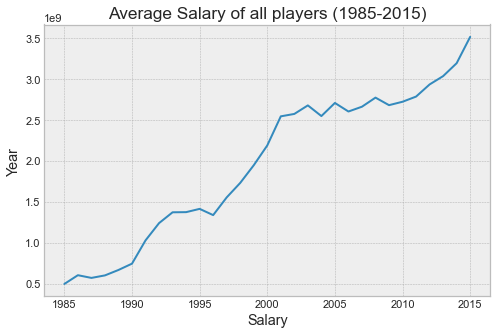

In [9]:
# merge salary and hallOfFame dataframes on playerID using outer join. Gives us the union of dataframes
## (i.e, all playerID's and their data). Some players will not have all data if not in both dataframes
outer_j=sal_df.merge(hall_df,how='outer',on='playerID')

# grouping by yearID and summing the salary for each year
sal_ovr_time=outer_j.groupby('yearID').agg({'salary':sum})

# setting salary column values as integers
sal_ovr_time['salary']=sal_ovr_time['salary'].astype(int)

display(sal_ovr_time.tail())

# lineplot of data with x-axis as yearID and y-axis as Salary
sb.set(rc={'figure.figsize':(8,5)})
plt.style.use("bmh")
sb.lineplot(data=sal_ovr_time,x='yearID',y='salary').set(title='Average Salary of all players (1985-2015)',
                                                         ylabel='Year',xlabel='Salary')

plt.show()

# can see salary has been steadily incresasing since 1985 across all players with salary data from both datasets
## (salary is in scientific ( millions ))

### Percent of inducted players / external data validation

In [10]:
inducted=outer_j[outer_j['inducted']=='Y'] # getting all inducted players

print(len(inducted['playerID'].unique()))

print(str(round(len(inducted['playerID'].unique()) / len(outer_j)*100,2)) + 
      "% of players have been inducted into hall of fame") 

# less than a percent of players in the dataset have been inducted into the hall of fame (from the hall_df)

312
0.97% of players have been inducted into hall of fame


https://baseballhall.org/discover-more/stories/hall-of-famer-facts/hall-of-famers-by-position

This source confirms that of the 19,000+ players who have played in the MLB only 235 have been elected (a rate of roughly 1%). After adding the 29 Negro League players and the 69 managers, umpires, and executives, the total # of elected members in the hall of fame comes to 333. Our dataset has 21 less members as the dataset is not fully up to date.

In [11]:
print(f'{333/len(outer_j)*100:.2f}%') 

# 333 is roughly 1% of our dataset, if we had fully up-to date data it should decrease

1.04%


### Inducted players salaries year-over-year

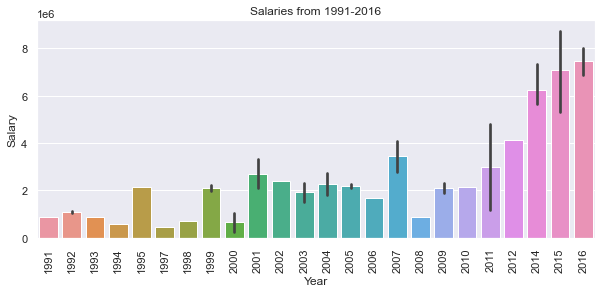

In [12]:
## Many players inducted into hall of fame dont have salary information (players from 1936-1991)

induc_means = inducted.groupby('playerID').agg({'salary':np.mean,'yearid':np.max,'votes':np.mean}).dropna()
# setting the types to integers
mean_df = induc_means.astype(int)
mean_df.sort_values(by='salary',ascending=False)


## pedro martinez had the highest average salary, and was inducted into the hall of fame in 2015

## The highest salaries come from the most recent hall of fame inductees (as expected)

# setting fig size 
sb.set(rc={'figure.figsize':(10,4)})
# rotating xticks
plt.xticks(rotation=90)
# creating barplot and setting properties
sb.barplot(data=mean_df,x='yearid',y='salary').set(title="Salaries from 1991-2016",ylabel='Salary',xlabel='Year')
plt.show()

# highest salaries come from 2015-16, with some spikes across the years (why is this ?)

In [13]:
display(induc_means[induc_means['yearid']==2008])

# some of the spikes in our visual above are from years where only 1 or a couple of players were inducted into the HOF

sal_df[sal_df['playerID']=='gossari01']
# richard gossages mean salary was heavily influenced by his salary in his late years, 
## which caused the low spike in 2008 

# I'm curious as to if there is anything affecting the number of players being inducted each year,
# possibly the nummber of votes required for induction? I will look into this below

,salary,yearid,votes
playerID,,,
gossari01,865504.285714,2008.0,466.0


,yearID,teamID,lgID,playerID,salary
431,1985,SDN,NL,gossari01,1713333
1133,1986,SDN,NL,gossari01,1046761
1806,1987,SDN,NL,gossari01,1273904
2055,1988,CHN,NL,gossari01,1331532
3182,1989,SFN,NL,gossari01,68000
5352,1992,OAK,AL,gossari01,300000
6247,1993,OAK,AL,gossari01,325000


### Votes needed over the years to be inducted into HOF

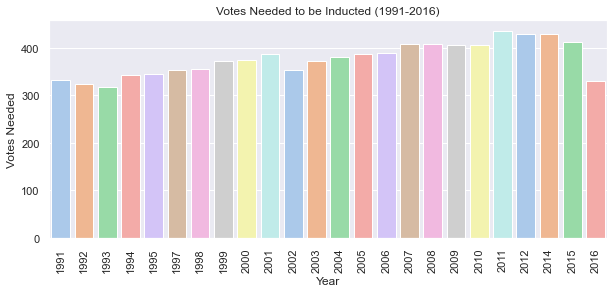

In [14]:
# grouping on year ID and aggregating with mean, dropping NA's, and setting type as ints
year_group=inducted.groupby('yearid').mean().dropna().reset_index().astype(int)

# rotate x ticks
plt.xticks(rotation=90)
sb.barplot(data=year_group, x='yearid',y='needed', palette='pastel').set(xlabel='Year', 
                                            ylabel='Votes Needed', title='Votes Needed to be Inducted (1991-2016)')
plt.show()

# From some research I learned that the number fluctuates based on how many members are on the 
# BBWAA(Baseball Writers Association of America), which changes every year. Yet it's still interesting 
# to see how the number of votes required to get inducted into the hall of fame has varied year-over-year.


## Looking at top paid salaries stats (positions, batting stance, etc) and comparing to top HOF salaried player stats. 

##### Getting portion of players ID for API request (The API endpoint either takes an integer ID (which I don't have yet) or a a first/last name). I dont have the first name, so I'll search by players by last name (won't be fully accurate). 

In [15]:
grouped_sals = sal_df.groupby('playerID').mean().sort_values(by='salary',ascending=False).reset_index()

# changing salaries to ints
grouped_sals['salary'] = grouped_sals['salary'].astype(int)

## to run an api request, we are gonna need some portion of the players last or first name. I'll take all
## the letters in the playerID except the last 4 (which are the first two letters of first name and some #)
highest_sal = grouped_sals['playerID'].str[:-4:]

# grabbing id of top paid player
for i in highest_sal.head(1):
    id_search = i

print(id_search)
print()

# we now have all letters the csv will give us for the last name

# new api request from player info endpoint, using id from previous api call
rq = requests.get("http://lookup-service-prod.mlb.com/json/named.search_player_all.bam?sport_code='mlb'&name_part='"
                  +id_search+"%25'").json()
          
print(rq)
# we can see Masahiro Tanaka (the highest paid player) is not in the mlb data api, we can see this as our queryResults
## only returned 1, and the player is Kensuke Tanaka
    

# WE CAN SEE THAT THIS DOESN'T ACTUALLY WORK, AS WE GOT MULTIPLE RESULTS, AND THE FIRST RESULT IS KENSUKE TANAKA,
## NOT MASAHIRO TANAKA. I will most likely use the Lahmans database.

tanak

{'search_player_all': {'copyRight': ' Copyright 2021 MLB Advanced Media, L.P.  Use of any content on this page acknowledges agreement to the terms posted here http://gdx.mlb.com/components/copyright.txt  ', 'queryResults': {'created': '2021-12-09T03:18:54', 'totalSize': '2', 'row': [{'position': 'LF', 'birth_country': 'Japan', 'weight': '170', 'birth_state': '', 'name_display_first_last': 'Kensuke Tanaka', 'college': '', 'height_inches': '9', 'name_display_roster': 'Tanaka', 'sport_code': 'mlb', 'bats': 'L', 'name_first': 'Kensuke', 'team_code': 'sfn', 'birth_city': 'Fukuoka', 'height_feet': '5', 'pro_debut_date': '2013-07-09T00:00:00', 'team_full': 'San Francisco Giants', 'team_abbrev': 'SF', 'birth_date': '1981-05-20T00:00:00', 'throws': 'R', 'league': 'NL', 'name_display_last_first': 'Tanaka, Kensuke', 'position_id': '7', 'high_school': 'Higashi Fukuoka, JPN', 'name_use': 'Kensuke', 'player_id': '547887', 'name_last': 'Tanaka', 'team_id': '137', 'service_years': '', 'active_s

<i> <h4> This didn't work as multiple players have the same last name (can't be fully accurate) <i/> <h4/>
   - must use the Lahman's database to get player full name for API request as none of our csv files have full names

In [16]:
import sqlite3

# learned how to use sqlite and connect to db in INFO 3401

# passing a string pointing to the .sqlite file (establishing connection to db)
con = sqlite3.connect("lahmansbaseballdb.sqlite")

# grabbing database name with sql query
db_name = pd.read_sql("PRAGMA database_list;", con)["name"][0] 

# selecting all tables from database
list_tables = f"SELECT * FROM {db_name}.sqlite_master WHERE type='table';" 

# assigning all tables to the lahamns variable, passing in the db connection as parameter
lahmans = pd.read_sql(list_tables , con=con) 

# looking at first 50 tables of db
lahmans[0:50]

,type,name,tbl_name,rootpage,sql
0,table,allstarfull,allstarfull,2,"CREATE TABLE ""allstarfull"" (\n\t""ID"" INTEGER N..."
1,table,appearances,appearances,151,"CREATE TABLE ""appearances"" (\n\t""ID"" INTEGER N..."
2,table,awardsmanagers,awardsmanagers,3436,"CREATE TABLE ""awardsmanagers"" (\n\t""ID"" INTEGE..."
3,table,awardsplayers,awardsplayers,3445,"CREATE TABLE ""awardsplayers"" (\n\t""ID"" INTEGER..."
4,table,awardssharemanagers,awardssharemanagers,3603,"CREATE TABLE ""awardssharemanagers"" (\n\t""ID"" I..."
5,table,awardsshareplayers,awardsshareplayers,3622,"CREATE TABLE ""awardsshareplayers"" (\n\t""ID"" IN..."
6,table,batting,batting,3757,"CREATE TABLE ""batting"" (\n\t""ID"" INTEGER NOT N..."
7,table,battingpost,battingpost,6554,"CREATE TABLE ""battingpost"" (\n\t""ID"" INTEGER N..."
8,table,collegeplaying,collegeplaying,7006,"CREATE TABLE ""collegeplaying"" (\n\t""ID"" INTEGE..."
9,table,divisions,divisions,7282,"CREATE TABLE ""divisions"" (\n\t""ID"" INTEGER NOT..."


In [17]:
# grabbing playerID, and first/last name from people table in SQlite database
name_df = pd.read_sql_query("SELECT playerID, nameFirst, nameLast FROM people", con)

# grouping salary df on playerID and getting average salary for each player
grouped_sal_merged = sal_df.groupby('playerID').agg({'salary':np.mean})

# merging the grouped dataframe with the name df in order to get full names of each grouped playerID
salary_and_names = grouped_sal_merged.merge(name_df,how='inner',on='playerID')

# assigning new column in the new dataframe as the full name (first+last name)
salary_and_names['fullName'] = salary_and_names['nameFirst']+" "+salary_and_names['nameLast']

# doing same for HOF dataset
inducted_players = induc_means.merge(name_df,how='inner',on='playerID')
inducted_players['fullName'] = inducted_players['nameFirst']+" "+inducted_players['nameLast']

# sorting by salary in descending order
top_sal_players = salary_and_names.sort_values(by='salary',ascending=False)

# selecting full name and salary columns from new dataframe
top_sal_players[['fullName','salary']].head(25)

# # now we have top salaried players in dataset and their full name for API request

,fullName,salary
4385,Masahiro Tanaka,2.200000e+07
3833,Alex Rodriguez,1.797220e+07
2064,Ryan Howard,1.552550e+07
4413,Mark Teixeira,1.470385e+07
2208,Derek Jeter,1.392727e+07
3954,CC Sabathia,1.383163e+07
1385,Prince Fielder,1.289145e+07
2440,Hiroki Kuroda,1.258082e+07
2574,Tim Lincecum,1.244438e+07
2827,Joe Mauer,1.241875e+07


### Looking at top players in Salary dataframe and Hall of Fame dataframe and comparing various stats from the API

In [18]:
ls = []
induc_lis=[]
pos_dic = {} # dict for storing player name and position, which will be used later


for i in top_sal_players['fullName'].head(25):
    # making a request on each iteration (full name)
    mlb_req = requests.get("http://lookup-service-prod.mlb.com/json/named.search_player_all.bam?sport_code='mlb'&name_part='"+i+"%25'").json()
    
    # iterating through api request
    for j in [mlb_req]:
        # using try, except for query results that come back with nothing
        try:
            # if the query has multiple results
            if int(j['search_player_all']['queryResults']['totalSize']) > 1:
                # append the first
                ls.append(j['search_player_all']['queryResults']['row'][0])
            # else append the one result
            else:
                # creating a dictionary of names(keys) and positions(values) which will be used later
                if j['search_player_all']['queryResults']['row']['name_display_first_last'] not in pos_dic:
                    pos_dic[j['search_player_all']['queryResults']['row']['name_display_first_last']] = j['search_player_all']['queryResults']['row']['position']
    
                ls.append(j['search_player_all']['queryResults']['row'])
        except:
            pass

# now were getting all the correct players and all players are outputting results
print(len(ls))

# creating dataframe of api results for future access
topsalary_df = pd.DataFrame(ls)


# second for loop is the same as previous, but for inducted players df
for i in inducted_players['fullName'].head(25):
    mlb_req = requests.get("http://lookup-service-prod.mlb.com/json/named.search_player_all.bam?sport_code='mlb'&name_part='"+i+"%25'").json()
    
    # iterating through api request
    for j in [mlb_req]:
        try:
                
            if int(j['search_player_all']['queryResults']['totalSize']) > 1:
                induc_lis.append(j['search_player_all']['queryResults']['row'][0])
            else:
                if j['search_player_all']['queryResults']['row']['name_display_first_last'] not in pos_dic:
                    pos_dic[j['search_player_all']['queryResults']['row']['name_display_first_last']] = j['search_player_all']['queryResults']['row']['position']
                induc_lis.append(j['search_player_all']['queryResults']['row'])
        except:
            pass
        
# creating df for future access
inducted_df = pd.DataFrame(induc_lis)
print(len(induc_lis))
    

25
25


#### Comparing Batting Stances

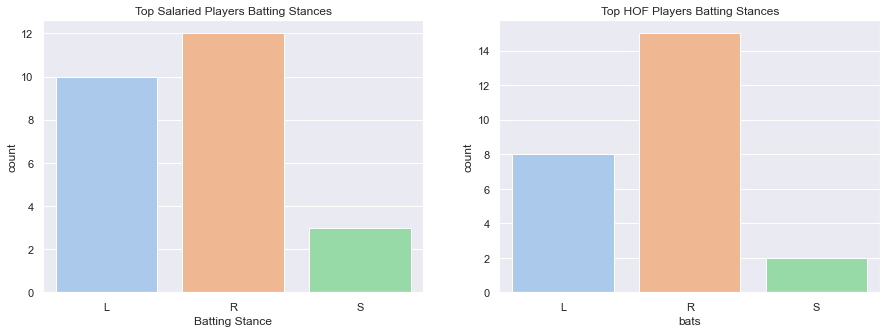

In [33]:
# hits=[]
# for i in ls:
#     hits.append(i['bats'])
    
# plt.style.use('seaborn')

# bat_L_R = pd.DataFrame({'batting':hits})

# sb.countplot(data=bat_L_R, x='batting', palette='pastel').set(title='Top Salaried Players Batting Stances',xlabel='Batting Stance')
# plt.show()


## I had all this code above to display the same plot, then I realised I could just create a dataframe from the API results
## above and easily do the same thing

# creating subplots (used from class)
fig_,(axi,axi2) = plt.subplots(ncols=2,sharey=False)
# set fig size
sb.set(rc={'figure.figsize':(15,5)})
#creating count plots and sorting on same value in each for same ordering
sb.countplot(topsalary_df['bats'].sort_values(0), palette='pastel',ax=axi).set(title='Top Salaried Players Batting Stances',
                                                         xlabel='Batting Stance')
sb.countplot(inducted_df['bats'].sort_values(0), palette='pastel',ax=axi2).set(title='Top HOF Players Batting Stances')
plt.show()

## majority of top 25 salaried players and top 25 HOF players bat righty, but the top 25 HOF players
## have less deviation between the columns and more centralized on righty

#### Comparing Leagues (National or American League)

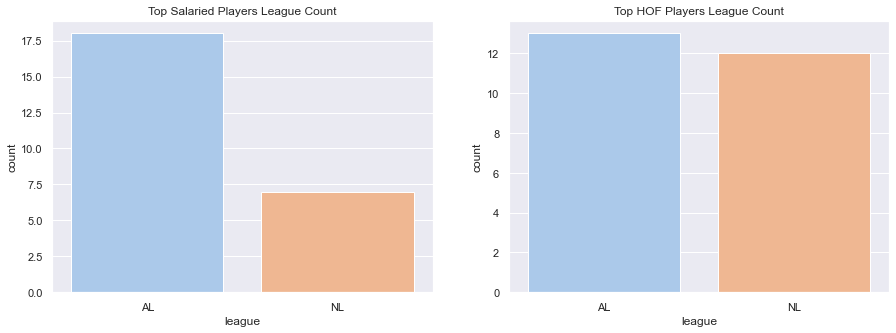

In [20]:
# creating subplots
fig_,(axi,axi2) = plt.subplots(ncols=2,sharey=False)

sb.countplot(topsalary_df['league'].sort_values(0), palette='pastel',ax=axi).set(
    title='Top Salaried Players League Count')

sb.countplot(inducted_df['league'].sort_values(0), palette='pastel',ax=axi2).set(
    title='Top HOF Players League Count')

plt.show()

# Top 25 HOF players have more of an even distribution, while top salaried players are more centralized in the
# American League

#### Comparing Positions

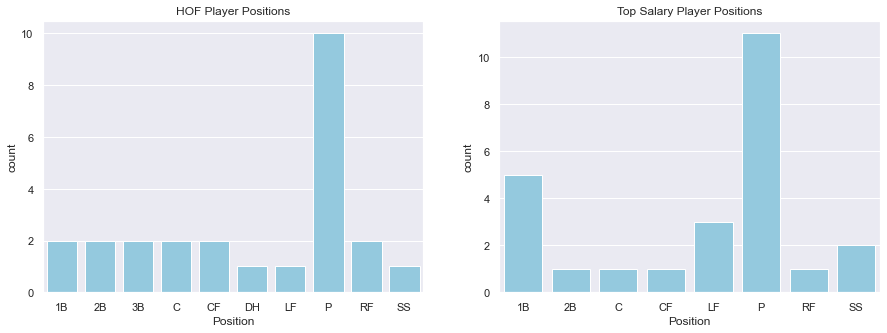

In [21]:
fig,(ax1,ax2) = plt.subplots(ncols=2,sharey=False) # used from class, creating subplots in order to display next to each other

sb.countplot(inducted_df['position'].sort_values(0),x=0,color='skyblue',ax=ax1).set(title='HOF Player Positions', xlabel='Position')
sb.countplot(topsalary_df['position'].sort_values(0),color='skyblue', ax=ax2).set(title='Top Salary Player Positions',xlabel='Position')

plt.show()

## Positions from both dataframes are quite similar, with the majority of top players being Pitchers, 
## yet HOF players have more variety in positions 

#### Comparing Height

In [22]:
# putting together player feet and inches for top 25 inducted players and top 25 salaried players to plot 
## distribtions of heights
induc_heights=[float(i['height_feet']+"."+i['height_inches']) for i in induc_lis]
sal_positions = [float(i['height_feet']+"."+i['height_inches']) for i in ls]

In [23]:
# creating dataframe with two columns and the positions as the data in the columns
exp = pd.DataFrame({"HOF": induc_heights,
                    "Top Salaried Players": sal_positions})

# passing data in to chart, and using transfrom fold method to indicate our experiment groups and what were measuring
alt.Chart(exp).transform_fold(
    ['HOF', 'Top Salaried Players'],
    as_=['Experiment', 'Measurement']
).mark_area(
    opacity=0.3,
    interpolate='step' # lowering opacity to see both distributions and setting interpolate to step for stepped visual
).encode(
    alt.X('Measurement:Q', bin=alt.Bin(maxbins=25)),# Using height binned as x-axis, setting max to 25 bins
    alt.Y('count()', stack=None), # using count() to get count of each height as y-axis
    alt.Color('Experiment:N') # setting color as experiment to differentiate colors
).properties(
    title='Distribution of player heights across top salary and HOF players') # setting title with .properties method

## Top Salary players have more of a uniform distribution, 
## while the majortiy of HOF players lie in the 5'6 to 6'1 range
## Top salary players also have more players with greater heights, which is expected as the average height has changed over the years

alt.Chart(...)

### Comparing Debut Year

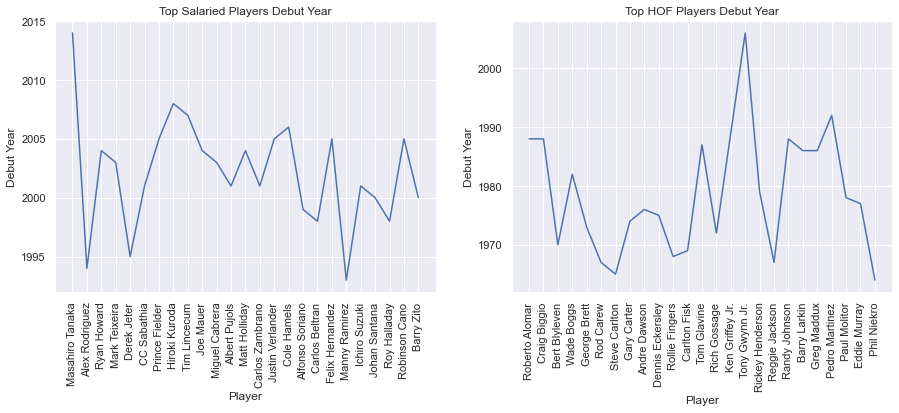

In [24]:
# grabbing select columns from dataframes, and using str method to select only year from pro_debut_date
select_df = topsalary_df[['name_display_first_last','pro_debut_date','player_id']]
select_df['pro_debut_date'] = select_df['pro_debut_date'].str[:4].astype(int)
ano_df = inducted_df[['name_display_first_last','pro_debut_date','player_id']]
ano_df['pro_debut_date'] = ano_df['pro_debut_date'].str[:4].astype(int)

# creating subplots
fig_,(ax1_,ax2_) = plt.subplots(ncols=2,sharey=False)

# rotating xticks on both plots
ax1_.set_xticklabels(select_df['name_display_first_last'],rotation=90)
ax2_.set_xticklabels(ano_df['name_display_first_last'],rotation=90)

# creating lineplots
sb.lineplot(data=select_df, x='name_display_first_last',y='pro_debut_date',ax=ax1_).set(
    title='Top Salaried Players Debut Year',xlabel='Player',ylabel='Debut Year')
sb.lineplot(data=ano_df, x='name_display_first_last',y='pro_debut_date',ax=ax2_).set(
    title='Top HOF Players Debut Year',xlabel='Player',ylabel='Debut Year')

plt.show()


# Reaults are both quite scattered, but the HOF range of years is 30 and top sal is 20 
## (meaning our HOF dataset is more spread out in terms of debut dates). We can see theres only one HOF player
## that had a debut date after 2000 (not suprising as it's incredibly difficult to be inducted at such a young age).
## Overall, our HOF debut dates consist of primarily between 1965-1990, while top salaried players debut dates
## is primarily 1995-2007 (younger, newer players)

In [25]:
ano_df[ano_df['pro_debut_date']>2000] # the player is Tony Gwynn Jr. 

,name_display_first_last,pro_debut_date,player_id
15,Tony Gwynn Jr.,2006,448242


### Looking at CAREER hitting stats across top 25 players of each dataset

In [26]:
HOF_dic = {}
SAL_dic = {}

# creating dictionaries for each of the api results with first name as key and the players ID as value
for i in induc_lis:
    if i['name_display_first_last'] not in HOF_dic:
        HOF_dic[i['name_display_first_last']] = i['player_id']
for i in ls:
    if i['name_display_first_last'] not in SAL_dic:
        SAL_dic[i['name_display_first_last']] = i['player_id']

# creating dfs of both with index as 1 (1 row) and transposing to get names in one column and IDs in the another
sal_name_id = pd.DataFrame(SAL_dic, index=[1]).transpose().reset_index()
hof_name_id = pd.DataFrame(HOF_dic, index=[1]).transpose().reset_index()


In [27]:
hof_ID_stats = []
sal_ID_stats = []

# making requests on each ID from the previous dictionaries
for i in HOF_dic.values():
    h_id_req = requests.get("http://lookup-service-prod.mlb.com/json/named.sport_career_hitting.bam?league_list_id='mlb'&game_type='R'&player_id="+i).json()
    for j in [h_id_req]:
        hof_ID_stats.append(j['sport_career_hitting']['queryResults']['row'])

for i in SAL_dic.values():
    s_id_req = requests.get("http://lookup-service-prod.mlb.com/json/named.sport_career_hitting.bam?league_list_id='mlb'&game_type='R'&player_id="+i).json()
    for j in [s_id_req]:
        sal_ID_stats.append(j['sport_career_hitting']['queryResults']['row'])
        
# storing results in df
hof_id_df = pd.DataFrame(hof_ID_stats)
sal_id_df = pd.DataFrame(sal_ID_stats)

In [28]:
# merging dfs on playerID in order to get fullnames with API results
merged_hof_ids = ano_df.merge(hof_id_df, on='player_id',how='inner') 

# doing same for other dataset
merged_sal_ids = select_df.merge(sal_id_df, on='player_id',how='inner')

print("Top Salary Players Avg Homeruns: "+str(merged_sal_ids['hr'].astype(int).mean()))

print("Top HOF Players Avg Homeruns: "+str(merged_hof_ids['hr'].astype(int).mean()))

## here we can really see the difference in stats between the two groups, and suprisingly, top salary players have 
## a higher avg number of homeruns than top HOF players 

Top Salary Players Avg Homeruns: 223.6
Top HOF Players Avg Homeruns: 185.24


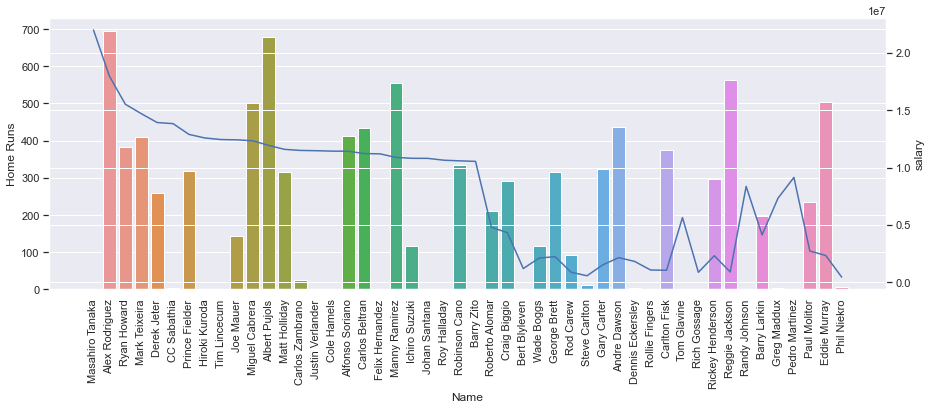

r-value: 0.08971157849245631


In [29]:
# selecting columns from df
sal_select = merged_sal_ids[['name_display_first_last','hr']]
# renaming
sal_select = sal_select.rename(columns={'name_display_first_last':'fullName'})
# setting hr column to ints
sal_select['hr'] = sal_select['hr'].astype(int)
# merging with top sal to get salary data with API results
sal_select_merge = sal_select.merge(top_sal_players,on='fullName',how='inner')

# doing same for other dataset
hof_select = merged_hof_ids.rename(columns={'name_display_first_last':'fullName'})
hof_select['hr'] = hof_select['hr'].astype(int)
hof_select_merge = hof_select.merge(inducted_players,on='fullName',how='inner')

# appending both into new df
top_25_together = sal_select_merge.append(hof_select_merge).reset_index()

# rotating xticks
plt.xticks(rotation=90)
sb.barplot(data=top_25_together, x='fullName',y='hr').set(ylabel='Home Runs',xlabel='Name')

# creating a twin y-axis, allows us to plot a lineplot across the bar plot with a different y-axis
ax3 = plt.twinx()
sb.lineplot(data=top_25_together,x='fullName',y='salary',ax=ax3)
plt.show()

# getting r-val by selecting the r-value (index 2) from the regression output
print("r-value: "+str(stats.linregress(top_25_together['hr'],top_25_together['salary'])[2]))

# this looks really weird with a lot of empty values, lets investigate why...

In [30]:
hr_0 = top_25_together[top_25_together['hr']<10]
display(hr_0['fullName'])

# we can use our position dictionary from previous to see all 0 hr player positions

# iterating through fullname in the position and fullname dict
for i in hr_0['fullName']:
    # if the players is in the dict, to print their position
    try:
        print(pos_dic[i])
    except:
        pass
    
## We can see all the players with essentially no data are pitchers, 
## which is making our visual look weird and skewing our correlation output

0      Masahiro Tanaka
5          CC Sabathia
7        Hiroki Kuroda
8         Tim Lincecum
14    Justin Verlander
15         Cole Hamels
18     Felix Hernandez
21       Johan Santana
22        Roy Halladay
24          Barry Zito
27       Bert Blyleven
34    Dennis Eckersley
35      Rollie Fingers
37         Tom Glavine
38        Rich Gossage
41       Randy Johnson
43         Greg Maddux
44      Pedro Martinez
47         Phil Niekro
Name: fullName, dtype: object

P
P
P
P
P
P
P
P
P
P
P
P
P
P
P
P
P


##### The pitchers from the dataset are interfering with the graph and our analysis, lets remove them

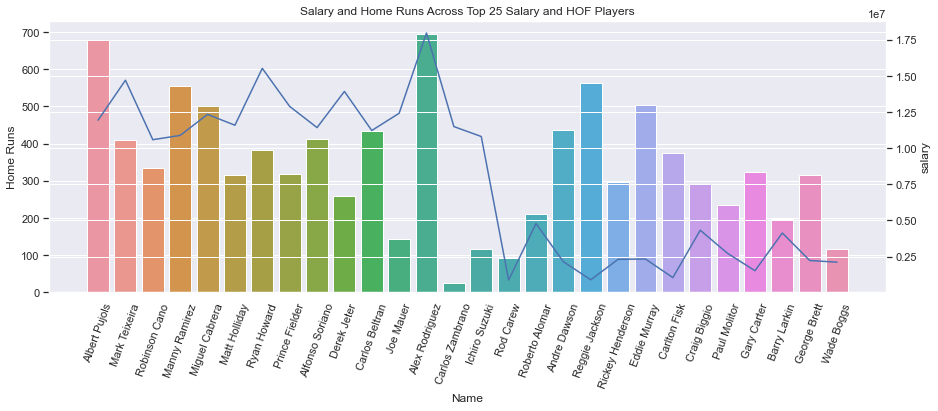

r-value: 0.2459118339825853


In [31]:
# selecting only players with >= 15 homeruns (to get rid of gaps)
topsal_select = sal_select_merge[sal_select_merge['hr']>=15]

# found this on stackOverflow, .sample() will grab a sample of your data, but passing in frac=1 randomly 
# sorts/shuffles the dataframe (changes every time we run but isn't all ascending anymore)
topsal_select = topsal_select.sample(frac=1)

# doing same for other df
shuffle_hof = hof_select_merge.sample(frac=1)
non_pitchers = shuffle_hof[shuffle_hof['hr']>=15]

# making df of both previous dfs
top_players_nopitch = topsal_select.append(non_pitchers).reset_index()

plt.xticks(rotation=70)
sb.barplot(data=top_players_nopitch, x='fullName',y='hr').set(ylabel='Home Runs',
                                                              xlabel='Name',title='Salary and Home Runs Across Top 25 Salary and HOF Players')
# creating twin y-axis again
ax3 = plt.twinx()
sb.lineplot(data=top_players_nopitch,x='fullName',y='salary',ax=ax3)
plt.show()

print("r-value: "+str(stats.linregress(top_players_nopitch['hr'],top_players_nopitch['salary'])[2]))

## much better looking, but still a weak correlation

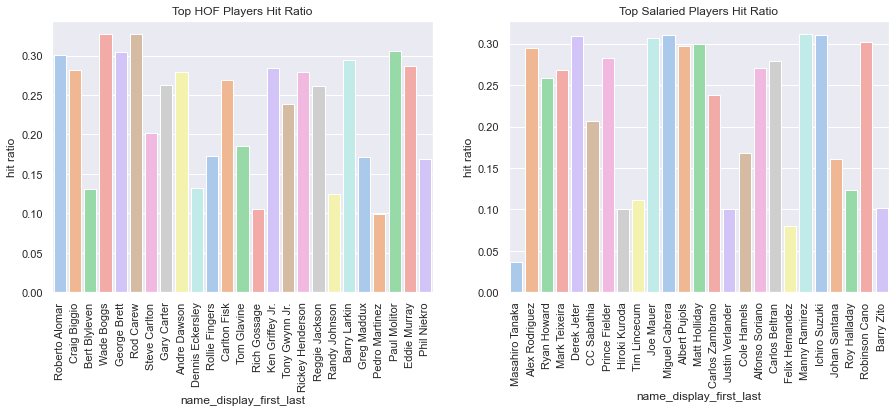

Average Hall of Fame player Hit Ratio: 0.2318610113179949
Average Top Salaried player Hit Ratio: 0.22123645349865925


In [32]:
# creating a new column in each df to store hit ratio (hits/at bats)
merged_hof_ids['hit ratio'] = merged_hof_ids['h'].astype(int)/merged_hof_ids['ab'].astype(int)
merged_sal_ids['hit ratio'] = merged_sal_ids['h'].astype(int)/merged_sal_ids['ab'].astype(int)

figs,(axis,axis_) = plt.subplots(ncols=2,sharey=False)

# setting x tick labels and rotating
axis.set_xticklabels(select_df['name_display_first_last'],rotation=90)
axis_.set_xticklabels(ano_df['name_display_first_last'],rotation=90)

sb.barplot(data=merged_hof_ids, x='name_display_first_last',y='hit ratio', palette='pastel',ax=axis).set(
    title='Top HOF Players Hit Ratio')

sb.barplot(data=merged_sal_ids, x='name_display_first_last',y='hit ratio', palette='pastel',ax=axis_).set(
    title='Top Salaried Players Hit Ratio')

plt.show()

print("Average Hall of Fame player Hit Ratio: "+str(merged_hof_ids['hit ratio'].mean()))
print("Average Top Salaried player Hit Ratio: "+str(merged_sal_ids['hit ratio'].mean()))

## very similar results in terms of hit ratios